# ALICE Masterclasses R$_{AA}$

Načítanie potrebných knižníc

In [14]:
import ALICE_RAA_Tools as at
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from matplotlib import colors as mcolors

Zoznam dostupných centralít:
 
0-5%, 0-10%, 5-10%, 10-20%, 20-30%, 30-40%, 40-50%, 50-60%, 60-70%, 70-80%, 80-90%
    

In [2]:
listCentralities = [(0,5),(5,10),(10,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80)]

Vytvorenie slovníkov

In [3]:
dictCentralities = at.create_dictionary(listCentralities)

processing centrality range: 0-5% - (0/5)
processing centrality range: 5-10% - (5/10)
processing centrality range: 10-20% - (10/20)
processing centrality range: 20-30% - (20/30)
processing centrality range: 30-40% - (30/40)
processing centrality range: 40-50% - (40/50)
processing centrality range: 50-60% - (50/60)
processing centrality range: 60-70% - (60/70)
processing centrality range: 70-80% - (70/80)


# 1. Analýza zrážok / eventov

### 1.1 Načítanie zrážok

Počítanie zrážok

In [4]:
event_lines = at.count_lines('event_information.csv')
print("Number of events: '" + str(event_lines) + "'!")

Number of events: '118909'!


Načítanie informácií o zrážke z CVS súboru

In [5]:
df_events = pd.read_csv("event_information.csv", header=None, names=['eventMult', 'eventCent'])

In [6]:
print(df_events.head())

   eventMult  eventCent
0          4   100.0000
1          1    88.2660
2        275    41.6756
3        449    23.1375
4        267    42.8638


### 1.2 Spracovanie dát

Pridanie stĺpcov do tabuľky s dátami pre každú centralitu

In [7]:
for key in dictCentralities:
    df_events[key] = False

print(df_events.head())

   eventMult  eventCent    0-5   5-10  10-20  20-30  30-40  40-50  50-60  \
0          4   100.0000  False  False  False  False  False  False  False   
1          1    88.2660  False  False  False  False  False  False  False   
2        275    41.6756  False  False  False  False  False  False  False   
3        449    23.1375  False  False  False  False  False  False  False   
4        267    42.8638  False  False  False  False  False  False  False   

   60-70  70-80  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False  


Naplnenie informácie o centralite a určenie počtu zrážok pre jeden centralitný interval

In [8]:
dictEventsCent = {}
for row in df_events.iterrows():
    keys = at.find_centralities(dictCentralities, row[1]['eventCent'])
    if keys:
        for cent in keys:
            df_events.loc[row[0], cent] = True
            if cent in dictEventsCent:
                dictEventsCent[cent] += 1
            else:
                dictEventsCent[cent] = 1
                
print(df_events.head())
print(dictEventsCent)

   eventMult  eventCent    0-5   5-10  10-20  20-30  30-40  40-50  50-60  \
0          4   100.0000  False  False  False  False  False  False  False   
1          1    88.2660  False  False  False  False  False  False  False   
2        275    41.6756  False  False  False  False  False   True  False   
3        449    23.1375  False  False  False   True  False  False  False   
4        267    42.8638  False  False  False  False  False   True  False   

   60-70  70-80  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False  
{'40-50': 12073, '20-30': 12202, '60-70': 12102, '50-60': 12144, '30-40': 12116, '0-5': 5984, '5-10': 6107, '10-20': 12040, '70-80': 12247}


### 1.3 Zobrazenie výsledkov

Vytvorenie a zobrazenie histogramov počtu častíc v zrážke

In [9]:
hTPC_0_100, bins = at.create_event_histos(df_events['eventMult'])
hTPC_0_5, bins = at.create_event_histos(df_events[df_events['0-5'] == True]['eventMult'])
hTPC_5_10, bins = at.create_event_histos(df_events[df_events['5-10'] == True]['eventMult'])
hTPC_10_20, bins = at.create_event_histos(df_events[df_events['10-20'] == True]['eventMult'])
hTPC_20_30, bins = at.create_event_histos(df_events[df_events['20-30'] == True]['eventMult'])
hTPC_30_40, bins = at.create_event_histos(df_events[df_events['30-40'] == True]['eventMult'])
hTPC_40_50, bins = at.create_event_histos(df_events[df_events['40-50'] == True]['eventMult'])
hTPC_50_60, bins = at.create_event_histos(df_events[df_events['50-60'] == True]['eventMult'])
hTPC_60_70, bins = at.create_event_histos(df_events[df_events['60-70'] == True]['eventMult'])
hTPC_70_80, bins = at.create_event_histos(df_events[df_events['70-80'] == True]['eventMult'])

In [11]:
hTPC_0_100_err = np.sqrt(hTPC_0_100)
hTPC_0_5_err = np.sqrt(hTPC_0_5)
hTPC_5_10_err = np.sqrt(hTPC_5_10)
hTPC_10_20_err = np.sqrt(hTPC_10_20)
hTPC_20_30_err = np.sqrt(hTPC_20_30)
hTPC_30_40_err = np.sqrt(hTPC_30_40)
hTPC_40_50_err = np.sqrt(hTPC_40_50)
hTPC_50_60_err = np.sqrt(hTPC_50_60)
hTPC_60_70_err = np.sqrt(hTPC_60_70)
hTPC_70_80_err = np.sqrt(hTPC_70_80)

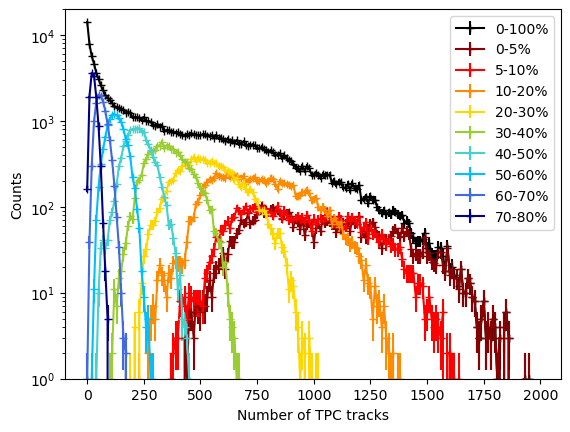

In [19]:
plt.errorbar(bins[:-1], hTPC_0_100, yerr=hTPC_0_100_err, marker='+', c='black', label='0-100%')
plt.errorbar(bins[:-1], hTPC_0_5, yerr=hTPC_0_5_err, marker='+', c='darkred', label='0-5%')
plt.errorbar(bins[:-1], hTPC_5_10, yerr=hTPC_5_10_err, marker='+', c='red', label='5-10%')
plt.errorbar(bins[:-1], hTPC_10_20, yerr=hTPC_10_20_err, marker='+', c='darkorange', label='10-20%')
plt.errorbar(bins[:-1], hTPC_20_30, yerr=hTPC_20_30_err, marker='+', c='gold', label='20-30%')
plt.errorbar(bins[:-1], hTPC_30_40, yerr=hTPC_30_40_err, marker='+', c='yellowgreen', label='30-40%')
plt.errorbar(bins[:-1], hTPC_40_50, yerr=hTPC_40_50_err, marker='+', c='mediumturquoise', label='40-50%')
plt.errorbar(bins[:-1], hTPC_50_60, yerr=hTPC_50_60_err,  marker='+', c='deepskyblue', label='50-60%')
plt.errorbar(bins[:-1], hTPC_60_70, yerr=hTPC_60_70_err, marker='+', c='royalblue', label='60-70%')
plt.errorbar(bins[:-1], hTPC_70_80, yerr=hTPC_70_80_err, marker='+', c='navy', label='70-80%')
#pre zoznam možných nastavení 'fmt' pozrite stránku:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

plt.xlabel('Number of TPC tracks')
plt.ylabel('Counts')
plt.ylim(1,2E4)
plt.yscale('log')

plt.legend(loc='upper right')
plt.savefig('TPC_tracks.pdf')

2D-obrázok: Počet častíc v zrážke vs. centralita

In [1]:
plt.hist2d(df_events['eventCent'],df_events['eventMult'], bins=(100,200), range=[[0, 100],[0, 2000] ], cmap=plt.cm.jet, norm=mpl.colors.LogNorm())

plt.colorbar()
plt.xlabel('Centrality')
plt.ylabel('Number TPC tracks')


NameError: name 'plt' is not defined

# 2. Dráhy častíc a hybnostné spektrá 

Zoznam dostupných centralít: 
0-5%, 0-10%, 5-10%, 10-20%, 20-30%, 30-40%, 40-50%, 50-60%, 60-70%, 70-80%, 80-90%

## 2.1 Načítanie dát pre zrážky olovo-olovo

In [21]:
print("Number of tracks: '38042122'! ~600MB )")

Number of tracks: '38042122'! ~600MB )


In [22]:
dictMomCent = {}
for key in dictCentralities:
    dictMomCent[key] = []

In [23]:
df_tracks = pd.read_pickle("./track_info.pkl", 'bz2').to_numpy()

### 2.2 Triedenie podľa centrality zrážky

Nasledujúca bunka je výpočtovo náročnejšia, trvá dlhšie.

In [ ]:
for line in df_tracks:
    keys = at.find_centralities(dictCentralities, line[1])
    if keys:
        for key in keys:
            dictMomCent[key].append(line[0])

### 2.3 Vytvorenie histogramov 

In [ ]:
binsPt = at.get_bins()
binWidth = at.get_bin_width(binsPt)
x_bin_width = np.asarray(binWidth)/2

In [ ]:
hPbPb_0_5, _ = np.histogram(dictMomCent['0-5'], binsPt)
hPbPb_0_5_err = np.sqrt(hPbPb_0_5) / dictEventsCent['0-5']
hPbPb_0_5 = hPbPb_0_5 / binWidth
hPbPb_0_5 = hPbPb_0_5 / dictEventsCent['0-5']

hPbPb_5_10, _ = np.histogram(dictMomCent['5-10'], binsPt)
hPbPb_5_10_err = np.sqrt(hPbPb_5_10) / dictEventsCent['5-10']
hPbPb_5_10 = hPbPb_5_10 / binWidth
hPbPb_5_10 = hPbPb_5_10 / dictEventsCent['5-10']

hPbPb_10_20, _ = np.histogram(dictMomCent['10-20'], binsPt)
hPbPb_10_20_err = np.sqrt(hPbPb_10_20) / dictEventsCent['10-20']
hPbPb_10_20 = hPbPb_10_20 / binWidth
hPbPb_10_20 = hPbPb_10_20 / dictEventsCent['10-20']

hPbPb_20_30, _ = np.histogram(dictMomCent['20-30'], binsPt)
hPbPb_20_30_err = np.sqrt(hPbPb_20_30) / dictEventsCent['20-30']
hPbPb_20_30 = hPbPb_20_30 / binWidth
hPbPb_20_30 = hPbPb_20_30 / dictEventsCent['20-30']

hPbPb_30_40, _ = np.histogram(dictMomCent['30-40'], binsPt)
hPbPb_30_40_err = np.sqrt(hPbPb_70_80) / dictEventsCent['30-40']
hPbPb_30_40 = hPbPb_30_40 / binWidth
hPbPb_30_40 = hPbPb_30_40 / dictEventsCent['30-40']

hPbPb_40_50, _ = np.histogram(dictMomCent['40-50'], binsPt)
hPbPb_40_50_err = np.sqrt(hPbPb_40_50) / dictEventsCent['40-50']
hPbPb_40_50 = hPbPb_40_50 / binWidth
hPbPb_40_50 = hPbPb_40_50 / dictEventsCent['40-50']

hPbPb_50_60, _ = np.histogram(dictMomCent['50-60'], binsPt)
hPbPb_50_60_err = np.sqrt(hPbPb_50_60) / dictEventsCent['50-60']
hPbPb_50_60 = hPbPb_50_60 / binWidth
hPbPb_50_60 = hPbPb_50_60 / dictEventsCent['50-60']

hPbPb_60_70, _ = np.histogram(dictMomCent['60-70'], binsPt)
hPbPb_60_70_err = np.sqrt(hPbPb_60_70) / dictEventsCent['60-70']
hPbPb_60_70 = hPbPb_60_70 / binWidth
hPbPb_60_70 = hPbPb_60_70 / dictEventsCent['10-20']

hPbPb_70_80, _ = np.histogram(dictMomCent['70-80'], binsPt)
hPbPb_70_80_err = np.sqrt(hPbPb_70_80) / dictEventsCent['70-80']
hPbPb_70_80 = hPbPb_70_80 / binWidth
hPbPb_70_80 = hPbPb_70_80 / dictEventsCent['70-80']

### 2.4 Načítanie dát referenčných zrážok protón-protón

In [ ]:
pp = np.genfromtxt('pp_reference.dat')
print(pp)
pp_err = np.divide(pp,10) #Predpoklad: 10% chyba pre meranie v pp zrážkach

### 2.5 Zobrazenie spektier priečnej hybnosti pre nabité častice 

In [ ]:
plt.errorbar(binsPt[:-1], hPbPb_0_5, xerr=x_bin_width, yerr=hPbPb_0_5_err, marker='+', c='darkred', label='0-5%')
plt.errorbar(binsPt[:-1], hPbPb_5_10, xerr=x_bin_width, yerr=hPbPb_5_10_err, marker='+', c='red', label='5-10%')
plt.errorbar(binsPt[:-1], hPbPb_10_20, xerr=x_bin_width, yerr=hPbPb_10_20_err, marker='+', c='darkorange', label='10-20%')
plt.errorbar(binsPt[:-1], hPbPb_20_30, xerr=x_bin_width, yerr=hPbPb_20_30_err, marker='+', c='gold', label='20-30%')
plt.errorbar(binsPt[:-1], hPbPb_30_40, xerr=x_bin_width, yerr=hPbPb_30_40_err, marker='+', c='yellowgreen', label='30-40%')
plt.errorbar(binsPt[:-1], hPbPb_40_50, xerr=x_bin_width, yerr=hPbPb_40_50_err, marker='+', c='mediumturquoise', label='40-50%')
plt.errorbar(binsPt[:-1], hPbPb_50_60, xerr=x_bin_width, yerr=hPbPb_50_60_err, marker='+', c='deepskyblue', label='50-60%')
plt.errorbar(binsPt[:-1], hPbPb_60_70, xerr=x_bin_width, yerr=hPbPb_60_70_err, marker='+', c='royalblue', label='60-70%')
plt.errorbar(binsPt[:-1], hPbPb_70_80, xerr=x_bin_width, yerr=hPbPb_70_80_err, marker='+', c='navy', label='70-80%')
plt.errorbar(binsPt[:-1], pp,          xerr=x_bin_width, yerr=pp_err,          marker='+', c='black', label='pp')

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 20)
plt.ylim(1E-6, 1E4)

plt.xlabel('$p_{T}$')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.show()

### 2.6 Definícia centralitných tried

Definícia počtu zrážok pre jednotlivé centralitné triedy

In [ ]:
dictNColl = {'0-5': 1686.87,
             '0-10': 1502.7,
             '5-10': 1319.89,
             '10-20': 923.89,
             '20-30': 558.68,
             '30-40': 321.20,
             '40-50': 171.67,
             '50-60': 85.13,
             '60-70': 38.51,
             '70-80': 15.78,
             '80-90': 6.32,
             'pp':1.
            }

print(dictNColl)

### 2.7 Výpočet a zobrazenie pomeru R$_\text{AA}$

In [ ]:
RAA_0_5 = np.divide(hPbPb_0_5 / dictNColl['0-5'], pp)
RAA_5_10 = np.divide(hPbPb_5_10 / dictNColl['5-10'], pp)
RAA_10_20 = np.divide(hPbPb_10_20 / dictNColl['10-80'], pp)
RAA_20_30 = np.divide(hPbPb_20_30 / dictNColl['20-30'], pp)
RAA_30_40 = np.divide(hPbPb_30_40 / dictNColl['30-40'], pp)
RAA_40_50 = np.divide(hPbPb_40_50 / dictNColl['40-50'], pp)
RAA_50_60 = np.divide(hPbPb_50_60 / dictNColl['50-60'], pp)
RAA_60_70 = np.divide(hPbPb_60_70 / dictNColl['60-70'], pp)
RAA_70_80 = np.divide(hPbPb_70_80 / dictNColl['70-80'], pp)

In [ ]:
RAA_0_5_err = at.uncertaintyCalculation(hPbPb_0_5, hPbPb_0_5_err, dictNColl['0-5'], pp, pp_err, dictNColl['pp'])
RAA_5_10_err = at.uncertaintyCalculation(hPbPb_5_10, hPbPb_5_10_err, dictNColl['5-10'], pp, pp_err, dictNColl['pp'])
RAA_10_20_err = at.uncertaintyCalculation(hPbPb_10_20, hPbPb_10_20_err, dictNColl['10-20'], pp, pp_err, dictNColl['pp'])
RAA_20_30_err = at.uncertaintyCalculation(hPbPb_20_30, hPbPb_20_30_err, dictNColl['20-30'], pp, pp_err, dictNColl['pp'])
RAA_30_40_err = at.uncertaintyCalculation(hPbPb_30_40, hPbPb_30_40_err, dictNColl['30-40'], pp, pp_err, dictNColl['pp'])
RAA_40_50_err = at.uncertaintyCalculation(hPbPb_40_50, hPbPb_40_50_err, dictNColl['40-50'], pp, pp_err, dictNColl['pp'])
RAA_50_60_err = at.uncertaintyCalculation(hPbPb_50_60, hPbPb_50_60_err, dictNColl['50-60'], pp, pp_err, dictNColl['pp'])
RAA_60_70_err = at.uncertaintyCalculation(hPbPb_60_70, hPbPb_60_70_err, dictNColl['60-70'], pp, pp_err, dictNColl['pp'])
RAA_70_80_err = at.uncertaintyCalculation(hPbPb_70_80, hPbPb_70_80_err, dictNColl['70-80'], pp, pp_err, dictNColl['pp'])

In [ ]:
plt.errorbar(binsPt[:-1], RAA_0_5, xerr=x_bin_width, yerr=RAA_0_5_err, marker='+', c='darkred', label='0-5%')
plt.errorbar(binsPt[:-1], RAA_5_10, xerr=x_bin_width, yerr=RAA_5_10_err, marker='+', c='red', label='5-10%')
plt.errorbar(binsPt[:-1], RAA_10_20, xerr=x_bin_width, yerr=RAA_10_20_err, marker='+', c='darkorange', label='10-20%')
plt.errorbar(binsPt[:-1], RAA_20_30, xerr=x_bin_width, yerr=RAA_20_30_err, marker='+', c='gold', label='20-30%')
plt.errorbar(binsPt[:-1], RAA_30_40, xerr=x_bin_width, yerr=RAA_30_40_err, marker='+', c='yellowgreen', label='30-40%')
plt.errorbar(binsPt[:-1], RAA_40_50, xerr=x_bin_width, yerr=RAA_40_50_err, marker='+', c='mediumturquoise', label='40-50%')
plt.errorbar(binsPt[:-1], RAA_50_60, xerr=x_bin_width, yerr=RAA_50_60_err, marker='+', c='deepskyblue', label='50-60%')
plt.errorbar(binsPt[:-1], RAA_60_70, xerr=x_bin_width, yerr=RAA_60_70_err, marker='+', c='royalblue', label='60-70%')
plt.errorbar(binsPt[:-1], RAA_70_80, xerr=x_bin_width, yerr=RAA_70_80_err, marker='+', c='navy, label='70-80%')

plt.ylim(0.01,1.2)
plt.xlabel('$p_{T}$')
plt.ylabel(r'$R_{AA}=\frac{1/N^{AA}_{evt}dN^{AA}/dp_t}{<N_{coll}>1/N_{pp_{evt}dN^{pp}/dp_t}}$')
plt.legend(loc='upper right')
plt.savefig('RAA_compared.pdf')

Výpis konkrétnej hodnoty pre jednu priečnu hybnosť

In [ ]:
print(RAA_70_80[binsPt.index(1.65)])